In [1]:
#libraries for manipulating data 
import pandas as pd
import numpy as np
#library to access to Good Drive 
import gspread 
#library for creating interactive dashboard
import panel as pn
pn.extension('tabulator')
import hvplot.pandas 
import holoviews as hv
hv.extension('brokeh')

In [2]:
gc = gspread.service_account(filename="service_account.json")
sh = gc.open('BECU Statement')

In [3]:
ws = sh.worksheet('BECU Statement')
df = pd.DataFrame(ws.get_all_records())
df.head()

,Date,No.,Description,Debit,Credit
0,5/10/2024,,External Deposit - Foundation Build U1513-00J9...,,724.9
1,5/9/2024,,Deposit - Mobile Banking,,180
2,5/9/2024,,POS Withdrawal - 930747 COSTCO GAS #074 ...,-54.03,
3,5/8/2024,,POS Deposit - AMAZON.COM SEATTLE ...,,45.94
4,5/8/2024,,POS Deposit - AMAZON.COM SEATTLE ...,,45.94


In [4]:
df=df[['Date', 'Description', 'Debit', 'Credit']]
df['Description'] = df['Description'].map(str.lower)

df['Category']='unassigned'

In [5]:
df.head()

,Date,Description,Debit,Credit,Category
0,5/10/2024,external deposit - foundation build u1513-00j9...,,724.9,unassigned
1,5/9/2024,deposit - mobile banking,,180,unassigned
2,5/9/2024,pos withdrawal - 930747 costco gas #074 ...,-54.03,,unassigned
3,5/8/2024,pos deposit - amazon.com seattle ...,,45.94,unassigned
4,5/8/2024,pos deposit - amazon.com seattle ...,,45.94,unassigned


In [6]:
#Catagories 

#Groceries
#Bills
#Eating Out
#Coffee
#Shopping 
#Gas
#Travel 
#Gifts 
#Car Maintenance 
#Home Improvement
#Medical
#Other


In [7]:
#Catagories 
#it is only taking the last line

#Groceries
df['Category'] = np.where(df['Description'].str.contains('costco whs|trader|safeway'),'Groceries', df['Category'])

#Bills
df['Category'] = np.where(df['Description'].str.contains('triad|trinity church'),'Bills', df['Category'])

#Eating Out
df['Category'] = np.where(df['Description'].str.contains('wendys|five guys|mcdonalds'),'Eating Out', df['Category'])

#Coffee
df['Category'] = np.where(df['Description'].str.contains('starbucks'),'Coffee', df['Category'])

#Shopping 
df['Category'] = np.where(df['Description'].str.contains('target|amazon|cash app'),'Shopping', df['Category'])

#Gas
df['Category'] = np.where(df['Description'].str.contains('costco gas|arco'),'Gas', df['Category'])

#Travel
df['Category'] = np.where(df['Description'].str.contains('airline'),'Travel', df['Category'])

#Gifts
df['Category'] = np.where(df['Description'].str.contains('oasis'),'Gifts', df['Category'])

#Car Maintenance
df['Category'] = np.where(df['Description'].str.contains('reilly'),'Car Maintenance', df['Category'])

#Home Improvement
df['Category'] = np.where(df['Description'].str.contains('home depot'),'Home Improvement', df['Category'])

#Medical
df['Category'] = np.where(df['Description'].str.contains('chiro'),'Medical', df['Category'])

#Income
df['Category'] = np.where(df['Description'].str.contains('foundation build|mobile banking'),'Income', df['Category'])

#Credit Card 
df['Category'] = np.where(df['Description'].str.contains('capital one|visa'),'Credit Card', df['Category'])


df['Date']=pd.to_datetime(df['Date'])

df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year


In [8]:
#since this dataset goes back I need to make sure my latest month comes from my latest year
latest_year = df['Year'].max()
latest_month = df[df['Year'] == latest_year]['Month'].max()

last_month_expenses = df[(df['Month']==latest_month) & (df['Year']==latest_year)]

In [9]:
last_month_expenses['Debit'] = last_month_expenses['Debit'].astype(str)
last_month_expenses['Debit'] = last_month_expenses['Debit'].replace('','0')
last_month_expenses['Debit'] = last_month_expenses['Debit'].astype(float)

C:\Users\matth\AppData\Local\Temp\ipykernel_8088\3373444193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_month_expenses['Debit'] = last_month_expenses['Debit'].astype(str)
C:\Users\matth\AppData\Local\Temp\ipykernel_8088\3373444193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_month_expenses['Debit'] = last_month_expenses['Debit'].replace('','0')
C:\Users\matth\AppData\Local\Temp\ipykernel_8088\3373444193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [10]:
last_month_expenses['Credit'] = last_month_expenses['Credit'].astype(str)
last_month_expenses['Credit'] = last_month_expenses['Credit'].replace('','0')
last_month_expenses['Credit'] = last_month_expenses['Credit'].astype(float)

C:\Users\matth\AppData\Local\Temp\ipykernel_8088\3054808749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_month_expenses['Credit'] = last_month_expenses['Credit'].astype(str)
C:\Users\matth\AppData\Local\Temp\ipykernel_8088\3054808749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_month_expenses['Credit'] = last_month_expenses['Credit'].replace('','0')
C:\Users\matth\AppData\Local\Temp\ipykernel_8088\3054808749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [11]:
last_month_expenses

,Date,Description,Debit,Credit,Category,Month,Year
0,2024-05-10,external deposit - foundation build u1513-00j9...,0.00,724.90,Income,5,2024
1,2024-05-09,deposit - mobile banking,0.00,180.00,Income,5,2024
2,2024-05-09,pos withdrawal - 930747 costco gas #074 ...,-54.03,0.00,Gas,5,2024
3,2024-05-08,pos deposit - amazon.com seattle ...,0.00,45.94,Shopping,5,2024
4,2024-05-08,pos deposit - amazon.com seattle ...,0.00,45.94,Shopping,5,2024
5,2024-05-08,pos withdrawal - amazon.com seatt...,-30.21,0.00,Shopping,5,2024
6,2024-05-08,pos withdrawal - amazon.com seatt...,-56.18,0.00,Shopping,5,2024
7,2024-05-08,pos withdrawal - amazon.com seatt...,-52.86,0.00,Shopping,5,2024
8,2024-05-08,pos withdrawal - amazon.com seatt...,-45.94,0.00,Shopping,5,2024
9,2024-05-07,external withdrawal - capital one - crcardpmt,-95.00,0.00,Credit Card,5,2024


In [11]:
last_month_expenses = last_month_expenses.groupby('Category')['Debit'].sum().reset_index()

In [12]:
last_month_expenses

,Category,Debit
0,Bills,-1527.02
1,Gas,-72.28
2,Groceries,-67.18
3,Income,0.00
4,Medical,-150.00
5,Shopping,-315.10
6,unassigned,-1155.59


In [13]:
last_month_tot_exp = last_month_expenses['Debit'].sum()
last_month_tot_exp

-3287.17

In [55]:
def calculate_difference(event):
    income = float(income_widget.value)
    reccuring_exp = float(recurring_exp_widget.value)
    monthly_exp = float(monthly_exp_widget.value)
    difference = income - reccuring_exp + monthly_exp
    difference_widget.value = str(round(difference,2))

income_widget = pn.widgets.TextInput(name='Income', value='0')
recurring_exp_widget = pn.widgets.TextInput(name='Reccuring Expenses', value='0')
monthly_exp_widget = pn.widgets.TextInput(name='Monthly Expenses', value=str(last_month_tot_exp))
difference_widget = pn.widgets.TextInput(name='Savings', value='0')

income_widget.param.watch(calculate_difference, 'value')
recurring_exp_widget.param.watch(calculate_difference, 'value')
monthly_exp_widget.param.watch(calculate_difference, 'value')

pn.Row(income_widget,recurring_exp_widget,monthly_exp_widget,difference_widget, width=450).show()

Launching server at http://localhost:55545


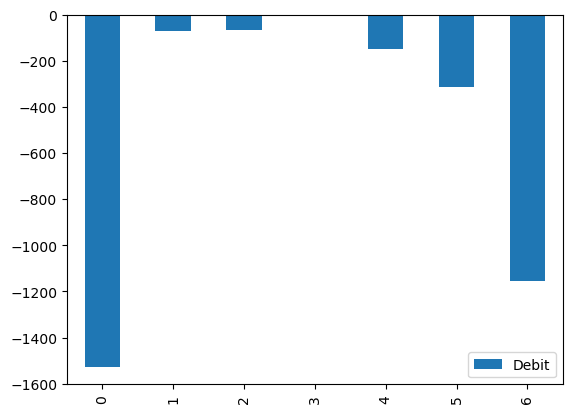

In [49]:
expense_bar = last_month_expenses.plot(kind='bar')

:Bars   [Category]   (Debit)
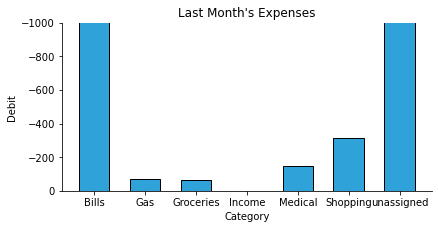

In [52]:
last_month_exp_chart = last_month_expenses.hvplot.bar(
    x = 'Category',
    y = 'Debit',
    height = 250,
    width = 550,
    title = "Last Month's Expenses",
    ylim = (0,-1000))

last_month_exp_chart

In [16]:
df['Date']=pd.to_datetime(df['Date'])
df['Month-Year'] = df['Date'].dt.to_period('M')

df['Category']=df['Category'].astype('str')
df['Debit']=df['Debit'].astype('str')
df['Debit']=df['Debit'].replace('','0')
df['Debit']=df['Debit'].astype('float')

monthly_exp_by_cat = df.groupby(['Month-Year', 'Category'])['Debit'].sum().reset_index()

In [17]:
monthly_exp_by_cat

,Month-Year,Category,Debit
0,2023-11,Eating Out,-3.29
1,2023-11,Gas,-67.33
2,2023-11,Groceries,-54.93
3,2023-11,Income,0.00
4,2023-11,Shopping,-554.05
5,2023-11,unassigned,-2301.15
6,2023-12,Bills,-1092.02
7,2023-12,Gas,-118.67
8,2023-12,Groceries,-105.48
9,2023-12,Home Improvement,-12.62


In [18]:
select_category = pn.widgets.Select(name='Select Category', options=[
                                   'All',
                                    'Groceries',
                                    'Bills',
                                    'Eating Out',
                                    'Coffee',
                                    'Shopping', 
                                    'Gas',
                                    'Travel', 
                                    'Gifts', 
                                    'Car Maintenance', 
                                    'Home Improvement',
                                    'Medical',
                                    'Income' ])

select_category

Select(options=['All', 'Groceries', ...], value='All')

In [19]:
def expenses_plot(category):
    if category =='All':
        plot_df = monthly_exp_by_cat.groupby('Month-Year').sum()
    else:
        plot_df = monthly_exp_by_cat[monthly_exp_by_cat['Category']==category].groupby('Month-Year').sum()
    plot = plot_df.hvplot.bar(x='Month-Year', y='Debit')
    return plot

In [20]:
@pn.depends(select_category.param.value)
def update_plot(category):
    plot = expenses_plot(category)
    return plot

Row
    [0] Select(options=['All', 'Groceries', ...], value='Coffee')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=400)
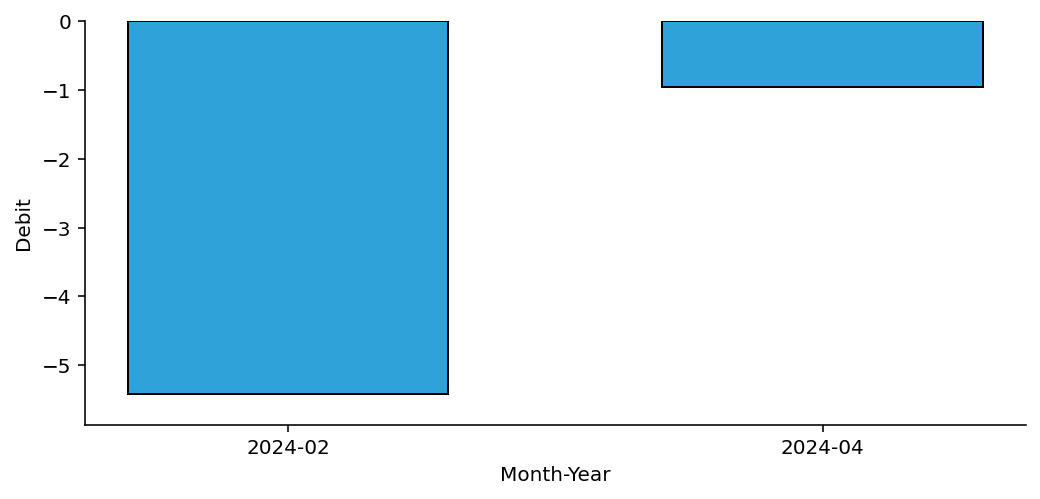

In [53]:
monthly_exp_by_cat_chart = pn.Row(select_category, update_plot)
monthly_exp_by_cat_chart[1].width=400

monthly_exp_by_cat_chart

In [48]:
df = df[['Date','Category','Description','Debit']]
df['Debit']=df['Debit'].astype('str')
df['Debit']=df['Debit'].replace('','0')
df['Debit']=df['Debit'].astype('float')

df = df.set_index('Date')

df

,Category,Description,Debit
Date,,,
2024-05-10,Income,external deposit - foundation build u1513-00j9...,0.00
2024-05-09,Income,deposit - mobile banking,0.00
2024-05-09,Gas,pos withdrawal - 930747 costco gas #074 ...,-54.03
2024-05-08,Shopping,pos deposit - amazon.com seattle ...,0.00
2024-05-08,Shopping,pos deposit - amazon.com seattle ...,0.00
2024-05-08,Shopping,pos withdrawal - amazon.com seatt...,-30.21
2024-05-08,Shopping,pos withdrawal - amazon.com seatt...,-56.18
2024-05-08,Shopping,pos withdrawal - amazon.com seatt...,-52.86
2024-05-08,Shopping,pos withdrawal - amazon.com seatt...,-45.94


In [49]:
def filter_summary(category):
    if category =='All':
        return df 
    return df[df['Category']==category]

summary_table = pn.widgets.DataFrame(filter_summary('All'), width=300, height=400)

In [50]:
def update_filter_summary(event):
    summary_table.value = filter_summary(event.now)
    
select_category.param.watch(update_filter_summary, 'value')

summary_table

DataFrame(height=400, sizing_mode='fixed', value=              ..., width=300)

In [56]:
template = pn.template.FastListTemplate(
    title = 'Financial Tracker',
    sidebar = [
        pn.pane.Markdown('You got to spend less to make more.'),
        pn.pane.Markdown(''),
        select_category
    ],

    main = [
        pn.Row(income_widget,recurring_exp_widget,monthly_exp_widget,difference_widget, width = 250),
        pn.Row(last_month_exp_chart),
        pn.GridBox(
            monthly_exp_by_cat_chart[1], 
            summary_table,
            ncols = 2,
            width = 300,
            align = 'start',
            sizing_mode = 'stretch_width'
        )
    ])

template.show()

Launching server at http://localhost:55555


2024-06-05 11:38:45,674 ERROR: panel.reactive - Callback failed for object named "Select Category" changing property {'value': 'Gifts'} 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\Lib\site-packages\panel\reactive.py", line 383, in _process_events
    self.param.update(**self_events)
  File "C:\Users\matth\anaconda3\Lib\site-packages\param\parameterized.py", line 1902, in update
    self_._batch_call_watchers()
  File "C:\Users\matth\anaconda3\Lib\site-packages\param\parameterized.py", line 2063, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "C:\Users\matth\anaconda3\Lib\site-packages\param\parameterized.py", line 2025, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "C:\Users\matth\AppData\Local\Temp\ipykernel_27280\2203381328.py", line 2, in update_filter_summary
    summary_table.value = filter_summary(event.now)
                                         ^^^^^^^^^
AttributeError: 'Event' object has no attribute 'now'
202